In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
laptop = pd.read_csv("../laptop.csv")

In [3]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1513 non-null   object 
 1   price             1513 non-null   int64  
 2   brand             1513 non-null   object 
 3   model             1513 non-null   object 
 4   processor         1513 non-null   object 
 5   ram memory        1513 non-null   int64  
 6   display size      1513 non-null   float64
 7   storage capacity  1479 non-null   object 
 8   cpu cores         1145 non-null   object 
 9   graphics card     0 non-null      float64
 10  graphics memory   235 non-null    object 
 11  touch             1513 non-null   bool   
 12  rating            1513 non-null   float64
 13  reviews           1513 non-null   int64  
 14  name              1513 non-null   object 
 15  url               1513 non-null   object 
dtypes: bool(1), float64(3), int64(3), object(9

In [4]:
laptop.describe()

,price,ram memory,display size,graphics card,rating,reviews
count,1513.000000,1513.000000,1513.000000,0.0,1513.000000,1513.000000
mean,122472.332452,10.532716,14.912293,NaN,0.284270,0.226702
std,71988.845441,5.103598,0.894601,NaN,1.103867,2.217839
min,25500.000000,4.000000,10.500000,NaN,0.000000,0.000000
25%,73990.000000,8.000000,14.000000,NaN,0.000000,0.000000
50%,104444.000000,8.000000,15.600000,NaN,0.000000,0.000000
75%,149990.000000,16.000000,15.600000,NaN,0.000000,0.000000
max,555555.000000,32.000000,17.300000,NaN,5.000000,73.000000


In [5]:
ram_prices = laptop.groupby(by='ram memory')['price']
# 4, 8, 16
group = ram_prices.apply(lambda x: x.reset_index(drop=True), include_groups=False)
rams = {}
for ram, prices in ram_prices:
    rams[ram] = prices.copy()
    print(f"Summary Statistics of {ram} GB RAM")
    print(rams[ram].describe())

Summary Statistics of 4 GB RAM
count      135.000000
mean     55860.259259
std      14832.523865
min      27999.000000
25%      45000.000000
50%      57000.000000
75%      65000.000000
max      89900.000000
Name: price, dtype: float64
Summary Statistics of 8 GB RAM
count       893.000000
mean      97397.563270
std       40312.314296
min       25500.000000
25%       71999.000000
50%       90999.000000
75%      115000.000000
max      555000.000000
Name: price, dtype: float64
Summary Statistics of 12 GB RAM
count         5.00000
mean      93795.80000
std       29490.37857
min       63990.00000
25%       64999.00000
50%       95000.00000
75%      115000.00000
max      129990.00000
Name: price, dtype: float64
Summary Statistics of 16 GB RAM
count       446.000000
mean     180777.257848
std       72535.245794
min       51000.000000
25%      129247.500000
50%      174999.500000
75%      214999.750000
max      555555.000000
Name: price, dtype: float64
Summary Statistics of 24 GB RAM
count     

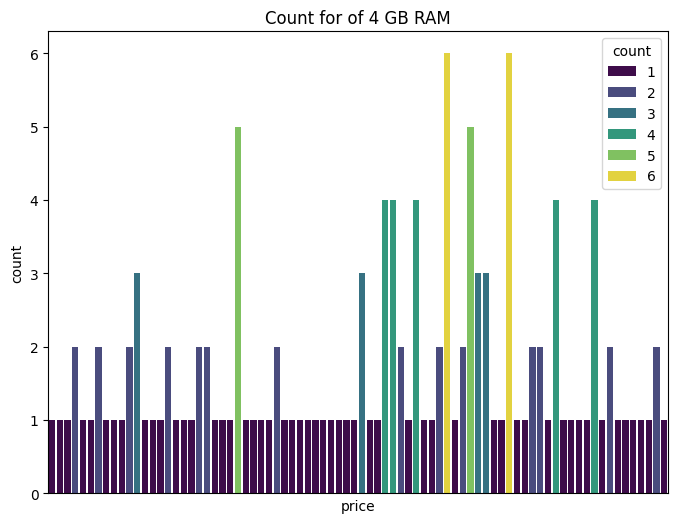

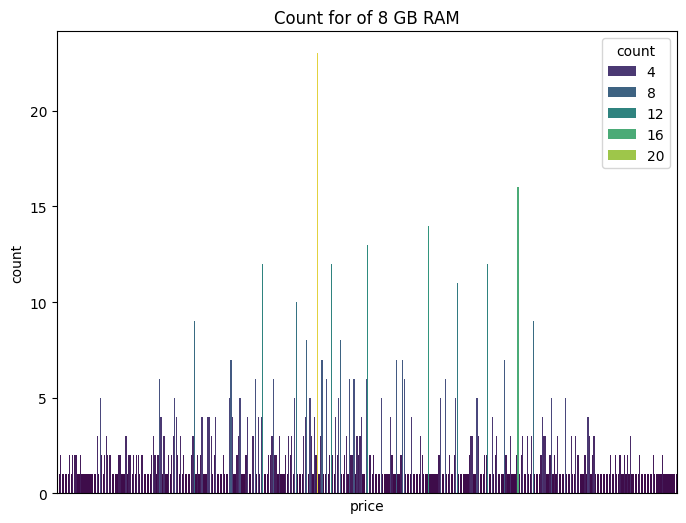

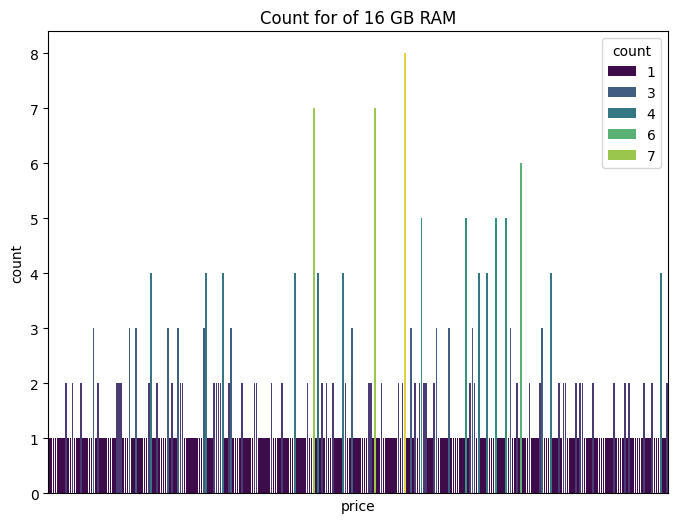

In [6]:
ram_group = laptop.groupby(by='ram memory')

for ram, prices in ram_group:
    if ram in [4, 8, 16]:
        norm_count = prices['price'].value_counts()
        df = norm_count.reset_index()
        df.columns = ['price', 'count']
        plt.figure(figsize=(8,6))
        sns.barplot(data=df, x='price', y='count', hue='count', palette='viridis', dodge=False)
        plt.title(f"Count for of {ram} GB RAM")
        plt.xticks([])
        plt.show()